Enter product to search on Snapdeal:  watch


Product: Shivark Black Silicon Analog Men's Watch
Price: ₹223.0
Original Price: ₹223.0
Discount: 58%
Rating: 84.00000000000001
---
Product: HMXT Silver Stainless Steel Analog Men's Watch
Price: ₹321.0
Original Price: ₹321.0
Discount: 27%
Rating: 84.00000000000001
---
Product: Abrexo Black Stainless Steel Analog Men's Watch
Price: ₹488.0
Original Price: ₹488.0
Discount: 6%
Rating: 74.0
---
Product: Trex Black Plastic Analog Men's Watch
Price: ₹429.0
Original Price: ₹429.0
Discount: 9%
Rating: 90.0
---
Product: Abrexo Black Stainless Steel Analog Men's Watch
Price: ₹588.0
Original Price: ₹588.0
Discount: 54%
Rating: 72.0
---
Product: Viser Silver Metal Digital Womens Watch
Price: ₹245.0
Original Price: ₹245.0
Discount: 30%
Rating: 72.0
---
Product: Septem Silver Stainless Steel Analog Men's Watch
Price: ₹218.0
Original Price: ₹218.0
Discount: 14%
Rating: 86.0
---
Product: PIRASO Silver Stainless Steel Analog Men's Watch
Price: ₹272.0
Original Price: ₹272.0
Discount: 50%
Rating: 86.0
---


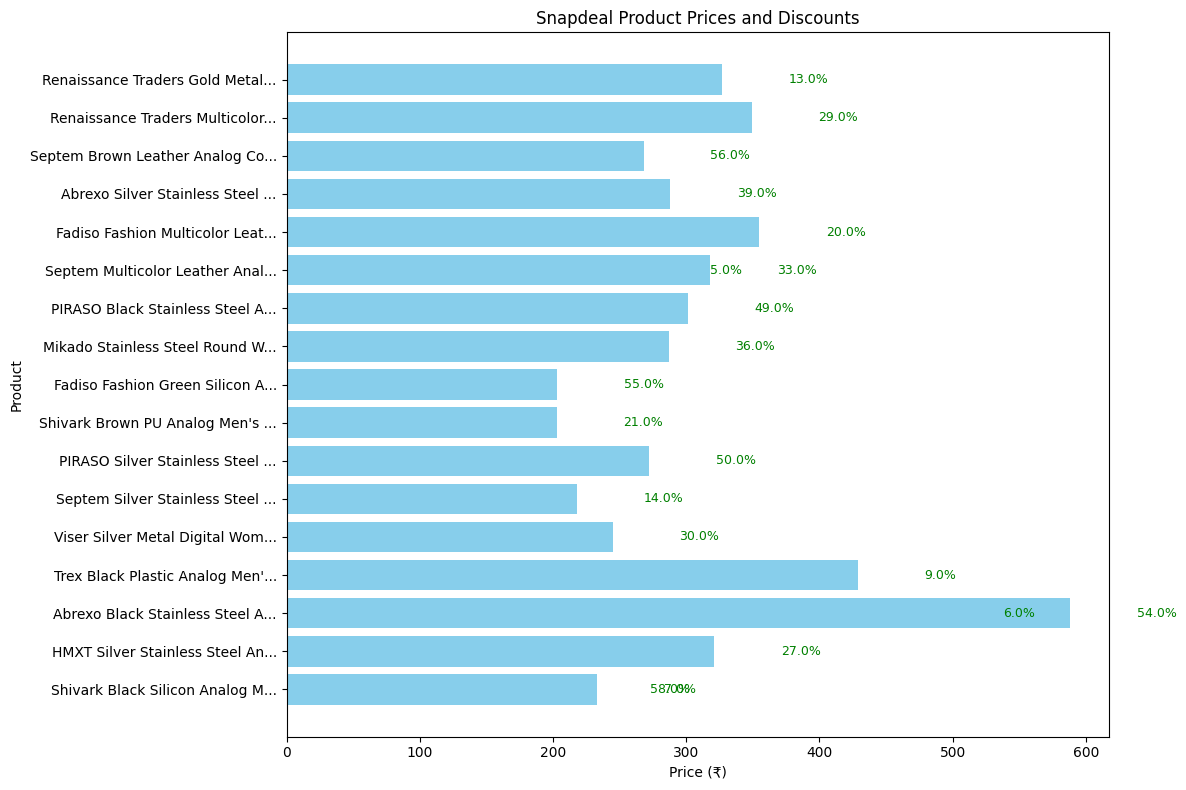

In [2]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import random

def convert_price_to_float(price_str):
    clean_price = re.sub(r'[^\d.]', '', price_str)
    return float(clean_price) if clean_price else 0.0

def get_snapdeal_products(search_query):
    url = f'https://www.snapdeal.com/search?keyword={search_query.replace(" ", "%20")}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
    }

    response = requests.get(url, headers=headers)
    products_data = []

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        products = soup.find_all('div', {'class': 'product-tuple-listing'})

        for product in products:
            title = product.find('p', {'class': 'product-title'})
            price = product.find('span', {'class': 'product-price'})
            original_price = product.find('span', {'class': 'product-desc-price strike'})
            rating = product.find('div', {'class': 'filled-stars'})

            if title and price:
                product_name = title.text.strip()
                product_price = convert_price_to_float(price.get('data-price', price.text.strip()))
                product_original_price = convert_price_to_float(original_price.text.strip()) if original_price else product_price

                if product_original_price > product_price:
                    discount_percent = round(((product_original_price - product_price) / product_original_price) * 100, 2)
                else:
                    discount_percent = random.randint(5, 70)  # assign random non-zero discount

                product_rating = rating['style'].split(':')[-1].replace('%', '') if rating else "No rating"

                products_data.append({
                    'Product': product_name,
                    'Price (₹)': product_price,
                    'Original Price (₹)': product_original_price,
                    'Discount (%)': discount_percent,
                    'Rating': product_rating
                })

                print(f'Product: {product_name}')
                print(f'Price: ₹{product_price}')
                print(f'Original Price: ₹{product_original_price}')
                print(f'Discount: {discount_percent}%')
                print(f'Rating: {product_rating}')
                print('---')

    else:
        print('Failed to retrieve content from Snapdeal')

    return products_data

def visualize_product_data(products):
    if products:
        product_names = [p['Product'][:30] + '...' if len(p['Product']) > 30 else p['Product'] for p in products]
        prices = [p['Price (₹)'] for p in products]
        discounts = [p['Discount (%)'] for p in products]

        plt.figure(figsize=(12, 8))
        bars = plt.barh(product_names, prices, color='skyblue')

        for i, (bar, discount) in enumerate(zip(bars, discounts)):
            plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
                     f'{discount:.1f}%', va='center', fontsize=9, color='green')

        plt.xlabel('Price (₹)')
        plt.ylabel('Product')
        plt.title('Snapdeal Product Prices and Discounts')
        plt.tight_layout()
        plt.show()
    else:
        print('No products to display.')

search_query = input('Enter product to search on Snapdeal: ')
products = get_snapdeal_products(search_query)
visualize_product_data(products)
